In [1]:
# importing required packages
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [95]:
# N is the number of rows or number of columns of the chess board (NxN)
N = int(input("Enter the N value:"))

Enter the N value:8


One of the right answers for N= 8 is shown below

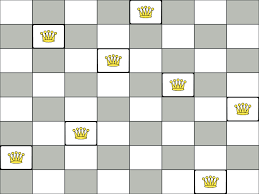

In [96]:
# randomly initializing the queen positions
def initialization(N,s=4):
    initial_solutions = []
    iter=0
    while iter < s:
        iter+=1
        solution = [random.choice(range(0,N)) for i in range(0,N)]
        initial_solutions.append(solution)
    return initial_solutions

# the above function initializes multiple sets of initial queen positions
# Let's say one set of queen position is [5,4,1,3,5,6,6,1] for N=8
# This means queen on the first column is in the 6th row (as we start counting from 0, 5 would be the 6th row)
# Queen in the second column is in the 5th row and so on until last column's queen is in the 2nd row
# Note that this randomly initialized queen position is not a solution as two queens are on the same row (6th and 7th column, therefore they are in attack position)

# visualizing the chromosome in the chess board format
def visualize(chromosome,N):
    empty_list = []
    [empty_list.append([' ']*N) for i in range(0,N)]

    for index,elem in enumerate(chromosome):
        empty_list[elem][index]='Q'

    return empty_list

# calculating the fitness value
def fitness_val(chromosome, N):
    fitness_value = 0

    for i in range(0, N):
        for j in range(i+1, N):
          # if the difference is 0 then the pair of queen is in the same row, if the difference is abs(i-j) then they are diagonally attacking
          # we dont have to worry about queens being in the same column, because of the way the chromosomes are initialized, two queens will never be in the same column
            if abs(chromosome[i] - chromosome[j]) not in [0, abs(i-j)]:
                fitness_value += 1

    return fitness_value

# checking if we reached the goal or not
def goal_check(fitness_value, max_fitness_value):
    return fitness_value == max_fitness_value

# roulette wheel selection
# higher probability of selecting parents that have higher fitness
def roulette_wheel_selection(population, fitness_values):
      selection = []
      total_fitness = sum(fitness_values)
      probs = [f/total_fitness for f in fitness_values]

      for i in range(len(population)):
          selection.append(random.choices(population, weights=probs, k=1)[0])

      return selection

# tournament selection - this may help if you are looking for diverse solutions (more exploration)
# it takes a small subset of the population and finds the fit individual from that subset - it repeats this multiple times to do the selection process
def tournament_selection(population, fitness_values, tournament_size):
    selection = []
    for i in range(len(population)):
        tournament_indices = random.sample(range(0, len(population)), tournament_size)
        tournament_fitness = [fitness_values[index] for index in tournament_indices]
        tournament_population = [population[index] for index in tournament_indices]
        winner = tournament_population[tournament_fitness.index(max(tournament_fitness))]
        selection.append(winner)

    return selection

# uniform crossover is creating children by using a probability of 50% of picking genes from either of the parents
# uniform crossover may help with diverse solutions
def uniform_crossover(selection):
    children = []
    for i in range(0, len(selection) - 1, 2):
        parent1 = selection[i]
        parent2 = selection[i+1]
        child1 = []
        child2 = []
        for j in range(len(parent1)):
            if random.random() < 0.5:
                child1.append(parent1[j])
                child2.append(parent2[j])

            else:
                child1.append(parent2[j])
                child2.append(parent1[j])

        children.append(child1)
        children.append(child2)

    return children

# another form of crossover
# ex: [a,b,c,d,e,f] and [x,y,z,p,q,r] let's say the crossover point is after 3rd element
# then children are [a,b,c,p,r,r] and [x,y,z,d,e,f]
def single_point_crossover(selection, crossover_rate):
    children = []
    for i in range(0, len(selection) - 1, 2):
        parent1 = selection[i]
        parent2 = selection[i+1]

        if random.random() > crossover_rate:

          k = random.randint(1, len(parent1) - 1)
          child1 = parent1[:k] + parent2[k:]
          child2 = parent2[:k] + parent1[k:]

        else:
          child1 = parent1.copy()
          child2 = parent2.copy()

        children.append(child1)
        children.append(child2)

    return children

# randomly changing the position of one of the gene to mimic mutation
def mutation(children, mutation_rate, N):
    mutated_children = []
    for i in range(len(children)):
        child = children[i]
        if random.random() > 1 - mutation_rate:
            index = random.randint(0, len(child) - 1)
            if child[index] == 0:
                child[index] = 1
            elif child[index] == N-1:
                child[index] = N - 2
            else:
                child[index] = random.choice([child[index] - 1, child[index] + 1])
            mutated_children.append(child)
        else:
            mutated_children.append(child)

    return mutated_children

In [108]:
# visualizing how the initial population would look like
# creating only two chromosomes
population = initialization(7, 2)
print(population)
res = []
for chromosome in population:
    res.append(visualize(chromosome, 7))

[[5, 0, 0, 4, 5, 5, 1], [6, 2, 4, 5, 2, 5, 4]]


In [109]:
# visualizing the first chromosome
res[0]

[[' ', 'Q', 'Q', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', 'Q'],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', 'Q', ' ', ' ', ' '],
 ['Q', ' ', ' ', ' ', 'Q', 'Q', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ']]

In [110]:
# visualizing the second chromosome
res[1]

[[' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', 'Q', ' ', ' ', 'Q', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', 'Q', ' ', ' ', ' ', 'Q'],
 [' ', ' ', ' ', 'Q', ' ', 'Q', ' '],
 ['Q', ' ', ' ', ' ', ' ', ' ', ' ']]

In [97]:
# checking if fitness value works correctly or not
chromosome = [6, 4, 2, 0, 5, 3, 1] # one of the solutions for N=7
# answer should be 21 (7*6/2)
fitness_val(chromosome, 7)

21

In [98]:
# performing genetic algorithm - currently only using roulette wheel selection, single point crossover
def genetic_algorithm(N, max_fitness_value, chrom_count, mutation_rate, crossover_rate, max_iter, window_size, tournament_size):
    # creating initial population
    population = initialization(N, chrom_count)
    best_fitness = []
    # running the fitness calculation, selection, crossover, mutation process for multiple times
    for i in range(max_iter):
        # calculating fitness for each chromosome in the population
        fitness_values = [fitness_val(chromosome, N) for chromosome in population]
        # pushing the best fitness to the list
        best_fitness.append(max(fitness_values))

        # checking if any of the chromosome has the maximum fitness or not
        # if maximum fitness is reached then we reached the goal and we can visualize the results
        for index, fitness_value in enumerate(fitness_values):
            if goal_check(fitness_value, max_fitness_value):
                print("Goal reached")
                res = visualize(population[index], N)
                return res, best_fitness

        # if we didn't reach the goal, then perform selection operation, then crossover, then mutation and repeat the whole process until goal is reached
        selection = roulette_wheel_selection(population, fitness_values)
        # selection = tournament_selection(population, fitness_values, tournament_size)
        children = single_point_crossover(selection, crossover_rate)
        # children = uniform_crossover(selection)
        mutated_children = mutation(children, mutation_rate, N)
        population = mutated_children.copy()

    # if we never reached the goal then print this
    if i == max_iter - 1:
        print("Goal not reached")

    return 0, best_fitness

In [100]:
max_fitness_value = N*(N-1)/2
print("Max possible fitness value:", max_fitness_value)
res, best_fitness = genetic_algorithm(N, max_fitness_value, 12, 0.2, 1, 10000, 10, 4)

Max possible fitness value: 28.0
Goal reached


In [101]:
res

[[' ', ' ', 'Q', ' ', ' ', ' ', ' ', ' '],
 ['Q', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', 'Q', ' '],
 [' ', ' ', ' ', ' ', 'Q', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Q'],
 [' ', 'Q', ' ', ' ', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', 'Q', ' ', ' ', ' ', ' '],
 [' ', ' ', ' ', ' ', ' ', 'Q', ' ', ' ']]

In [102]:
max(best_fitness)

28

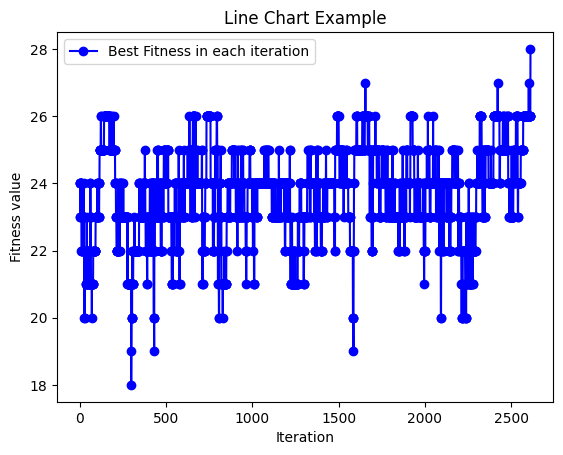

In [103]:
x_values = range(len(best_fitness))

# Create a line plot
plt.plot(x_values, best_fitness, marker='o', linestyle='-', color='b', label='Best Fitness in each iteration')

# Add title and labels
plt.title('Line Chart Example')
plt.xlabel('Iteration')
plt.ylabel('Fitness value')

# Show a legend
plt.legend()

# Display the plot
plt.show()